In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!ls

drive  sample_data


In [3]:
!pwd

/content


In [4]:
%cd /content/drive/MyDrive/AIR24/CNN

/content/drive/MyDrive/AIR24/CNN


In [5]:
!pwd

/content/drive/MyDrive/AIR24/CNN


In [6]:
!ls

 bank_note_recognition_dec.model   model_re		   plot.png     test_dec.zip
 images				   nndl_bank.zip	  'save path'  'Test image banknote.ipynb'
 lenet_model.h5			   output_with_label.jpg   test_dec


In [7]:
dataset_path="images/"
model_path="lenet_model.h5"
plot_path="plot.png"


In [8]:
# Import the necessary packages
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import img_to_array, to_categorical
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import random
import cv2
import os





# initialize the number of epochs to train for, initial learning rate,
# and batch size
EPOCHS = 25
INIT_LR = 1e-3
BS = 32


In [9]:
# import the necessary packages
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dense
from keras import backend as K
class LeNet:
  @staticmethod
  def build(width, height, depth, classes):
    # initialize the model
    model = Sequential()
    inputShape = (height, width, depth)


    # if we are using "channels first", update the input shape
    if K.image_data_format() == "channels_first":
      inputShape = (depth, height, width)


    # first set of CONV => RELU => POOL layers
    model.add(Conv2D(20, (5, 5), padding="same",
      input_shape=inputShape))
    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))


    # second set of CONV => RELU => POOL layers
    model.add(Conv2D(50, (5, 5), padding="same"))
    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))


    # first (and only) set of FC => RELU layers
    model.add(Flatten())
    model.add(Dense(500))
    model.add(Activation("relu"))


    # softmax classifier
    model.add(Dense(classes))
    model.add(Activation("softmax"))


    # return the constructed network architecture
    return model


In [10]:
!ls

 bank_note_recognition_dec.model   model_re		   plot.png     test_dec.zip
 images				   nndl_bank.zip	  'save path'  'Test image banknote.ipynb'
 lenet_model.h5			   output_with_label.jpg   test_dec


[INFO] loading images...
Processing image: images/inr10/aug_814.jpg
Processing image: images/inr100/aug_52.jpg
Processing image: images/inr10/aug_529.jpg
Processing image: images/inr10/aug_825.jpg
Processing image: images/inr100/aug_553.jpg
Processing image: images/inr100/aug_35.jpg
Processing image: images/inr100/aug_227.jpg
Processing image: images/inr100/aug_488.jpg
Processing image: images/inr10/aug_173.jpg
Processing image: images/inr100/aug_96.jpg
Processing image: images/inr100/aug_621.jpg
Processing image: images/inr100/aug_392.jpg
Processing image: images/inr100/aug_119.jpg
Processing image: images/inr10/aug_905.jpg
Processing image: images/inr10/aug_792.jpg
Processing image: images/inr100/aug_230.jpg
Processing image: images/inr100/aug_85.jpg
Processing image: images/inr100/aug_913.jpg
Processing image: images/inr100/aug_157.jpg
Processing image: images/inr100/aug_510.jpg
Processing image: images/inr10/aug_997.jpg
Processing image: images/inr10/aug_811.jpg
Processing image: i

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[INFO] training network...
Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


46/46 ━━━━━━━━━━━━━━━━━━━━ 10s 121ms/step - accuracy: 0.8207 - loss: 0.3644 - val_accuracy: 1.0000 - val_loss: 2.1331e-06
Epoch 2/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 6.4351e-07 - val_accuracy: 1.0000 - val_loss: 2.3801e-06
Epoch 3/25


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


46/46 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 1.0000 - loss: 1.1714e-06 - val_accuracy: 1.0000 - val_loss: 5.8285e-06
Epoch 4/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 6.7094e-07 - val_accuracy: 1.0000 - val_loss: 5.7766e-06
Epoch 5/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 1.0000 - loss: 1.2078e-06 - val_accuracy: 1.0000 - val_loss: 3.6993e-06
Epoch 6/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 1.1943e-06 - val_accuracy: 1.0000 - val_loss: 3.6680e-06
Epoch 7/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 1.0000 - loss: 1.0811e-06 - val_accuracy: 1.0000 - val_loss: 2.4430e-06
Epoch 8/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 6.6297e-07 - val_accuracy: 1.0000 - val_loss: 2.4250e-06
Epoch 9/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 1.0000 - loss: 6.0809e-07 - val_accuracy: 1.0000 - val_loss: 1.7854e-06
Epoch 10/25
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000

[INFO] serializing network...


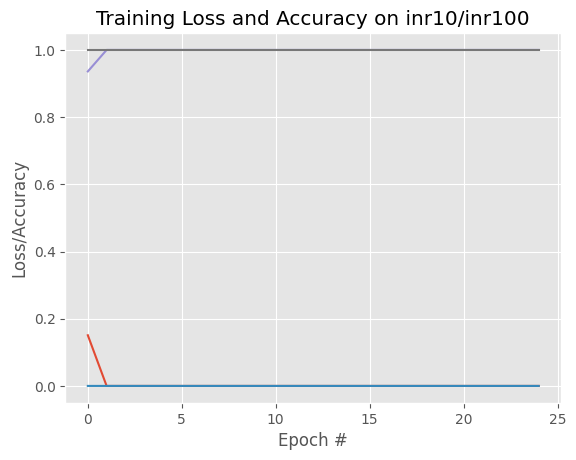

In [11]:
# initialize the data and labels
print("[INFO] loading images...")
data = []
labels = []


# grab the image paths and randomly shuffle them
imagePaths = sorted(list(paths.list_images(dataset_path)))
random.seed(42)
random.shuffle(imagePaths)


# loop over the input images
for imagePath in imagePaths:
    # load the image, pre-process it, and store it in the data list
    print(f"Processing image: {imagePath}")
    image = cv2.imread(imagePath)
    image = cv2.resize(image, (28, 28))
    image = img_to_array(image)
    data.append(image)


    # extract the class label from the image path and update the labels list
    label = imagePath.split(os.path.sep)[-2]
    #print(f"Extracted label: {label}")
    label = 1 if label == "inr10" else 0
    #print(f"Assigned numeric label: {label}")
    labels.append(label)


# scale the raw pixel intensities to the range [0, 1]
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)


# partition the data into training and testing splits using 75% of the data for training and the remaining 25% for testing
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.25, random_state=42)


# convert the labels from integers to vectors
trainY = to_categorical(trainY, num_classes=2)
testY = to_categorical(testY, num_classes=2)


# construct the image generator for data augmentation
aug = ImageDataGenerator(rotation_range=30, width_shift_range=0.1,
                         height_shift_range=0.1, shear_range=0.2, zoom_range=0.2,
                         horizontal_flip=True, fill_mode="nearest")


# initialize the model
print("[INFO] compiling model...")
model = LeNet.build(width=28, height=28, depth=3, classes=2)
opt = Adam(learning_rate =INIT_LR)
model.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])


# train the network
print("[INFO] training network...")
H = model.fit(aug.flow(trainX, trainY, batch_size=BS),
              validation_data=(testX, testY), steps_per_epoch=len(trainX) // BS,
              epochs=EPOCHS, verbose=1)


# save the model to disk
print("[INFO] serializing network...")
model.save(model_path)


# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
N = EPOCHS
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on inr10/inr100")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
#plt.legend(loc="lower left")
plt.savefig(plot_path)


[INFO] loading network...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 483ms/step
Label: 100 Rs, with Prob: 100.00%


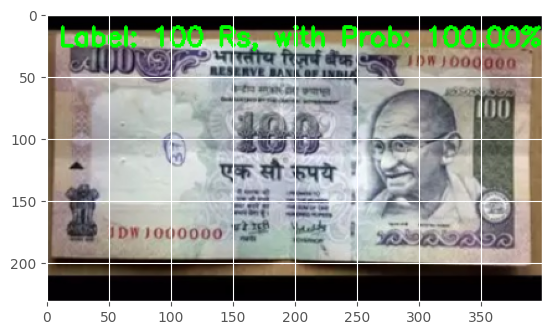

In [12]:
# testing phase
image_path = "test_dec/img3.jpg" # we can vary the various image like image1, image2, image3, image4 so that we can get various prediction
# for various output images
model_path = "lenet_model.h5"


# import the necessary packages
from tensorflow.keras.utils import img_to_array
from keras.models import load_model
import numpy as np
import cv2
import imutils


# load the image
image = cv2.imread(image_path)
orig = image.copy()


# pre-process the image for classification
image = cv2.resize(image, (28, 28))
image = image.astype("float") / 255.0
image = img_to_array(image)
image = np.expand_dims(image, axis=0)


# load the trained convolutional neural network
print("[INFO] loading network...")
model = load_model(model_path)


# classify the input image
(inr100, inr10) = model.predict(image)[0]


# build the label
label = "Label: 10 Rs, with Prob" if inr10 > inr100 else "Label: 100 Rs, with Prob"
proba = inr10 if inr10 > inr100 else inr100
label = "{}: {:.2f}%".format(label, proba * 100)
print(label)


plt.figure()
# draw the label on the image
output = imutils.resize(orig, width=400)
cv2.putText(output, label, (10, 25), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)


# show the output image
img1 = output[:, :, ::-1]
plt.imshow(img1)


[INFO] loading network...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step
Label: 10 Rs, with Prob: 100.00%


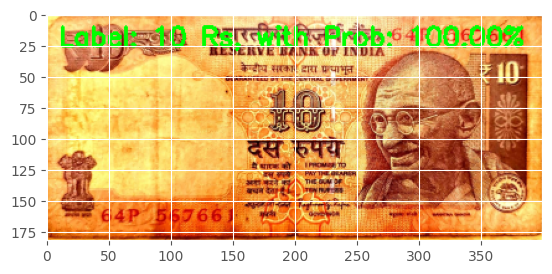

<function print>

In [13]:
# Testing phase
image_path = "test_dec/img4.jpg"  # Update the path as needed
model_path = "lenet_model.h5"

# Import necessary packages
from tensorflow.keras.utils import img_to_array
from keras.models import load_model
import numpy as np
import cv2
import imutils
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread(image_path)
orig = image.copy()

# Pre-process the image for classification
image = cv2.resize(image, (28, 28))
image = image.astype("float") / 255.0
image = img_to_array(image)
image = np.expand_dims(image, axis=0)

# Load the trained convolutional neural network
print("[INFO] loading network...")
model = load_model(model_path)

# Classify the input image
(inr100, inr10) = model.predict(image)[0]

# Build the label
label = "Label: 10 Rs, with Prob" if inr10 > inr100 else "Label: 100 Rs, with Prob"
proba = inr10 if inr10 > inr100 else inr100
label = "{}: {:.2f}%".format(label, proba * 100)
print(label)

# Draw the label on the image
output = imutils.resize(orig, width=400)
cv2.putText(output, label, (10, 25), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)

# Show the output image
img2 = output[:, :, ::-1]
plt.imshow(img2)
plt.show()

# Save the output image
output_image_path = "output_with_label.jpg"
cv2.imwrite(output_image_path, output)
print
